In [2]:
# Importing liberaries ::

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datasist as ds
import warnings as w


In [3]:
# Set some restruction ::

w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [ 10 , 10 ]} , font_scale = 1.5)

In [5]:
# import dataset ::

df = pd.read_csv("bikes.csv")
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247.000000
725,2012-12-28,5.545775,54.242931,14.792709,644.000000
726,2012-12-29,4.924888,54.010283,14.777848,575.666667
727,2012-12-30,4.304001,53.777635,14.762987,507.333333


* From The result above we can se some observations ::
    * There are col od date which we can apply on it some feature _engineering_technices.
    * There are Temp , Hummy , Wind are fraction folat values .
    * The Target is Count col bu it habve errrs values we must solve it .
    

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
date           729 non-null object
temperature    729 non-null float64
humidity       729 non-null float64
windspeed      729 non-null float64
count          729 non-null float64
dtypes: float64(4), object(1)
memory usage: 28.6+ KB


* From the result above we can see some observations ::
    * Num of samples :: 729 row
    * Num of Features :: 5 Features (Variables)
    * May be there arn't misssng data_values But we must Ensure that observation.
    * The Dtype of date is object insted of datetime dtype we must convert that col dtype.
    * The count col is Float dtype insted of intger dtype we must convert that col .

In [7]:
df.describe()

,temperature,humidity,windspeed,count
count,729.000000,729.000000,729.000000,729.000000
mean,17.762024,56.514591,17.241418,622.818930
std,8.921313,7.348730,5.222353,383.958772
min,-2.200000,21.300000,5.300000,2.000000
25%,10.066578,51.561669,13.462096,256.333333
50%,18.087694,56.546144,16.656522,639.000000
75%,25.455587,61.423987,20.320807,891.666667
max,35.100000,75.600000,35.200000,1820.000000


* From the result above we can see some observations ::
    * Temp , Hummy , Wind :: have stander disprision

In [8]:
df.columns

Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [11]:
for col in df.columns :
    print(f"The Col :: {col}\n")
    print(f"The Unique_values of ::({col}) :: {df[col].unique()}\n")
    print(f"The Value_count of :: ({col}) ::\n{df[col].value_counts()}\n")
    print("-"*20 )

The Col :: date

The Unique_values of ::(date) :: ['2011-01-03' '2011-01-04' '2011-01-05' '2011-01-06' '2011-01-07'
 '2011-01-08' '2011-01-09' '2011-01-10' '2011-01-11' '2011-01-12'
 '2011-01-13' '2011-01-14' '2011-01-15' '2011-01-16' '2011-01-17'
 '2011-01-18' '2011-01-19' '2011-01-20' '2011-01-21' '2011-01-22'
 '2011-01-23' '2011-01-24' '2011-01-25' '2011-01-26' '2011-01-27'
 '2011-01-28' '2011-01-29' '2011-01-30' '2011-01-31' '2011-02-01'
 '2011-02-02' '2011-02-03' '2011-02-04' '2011-02-05' '2011-02-06'
 '2011-02-07' '2011-02-08' '2011-02-09' '2011-02-10' '2011-02-11'
 '2011-02-12' '2011-02-13' '2011-02-14' '2011-02-15' '2011-02-16'
 '2011-02-17' '2011-02-18' '2011-02-19' '2011-02-20' '2011-02-21'
 '2011-02-22' '2011-02-23' '2011-02-24' '2011-02-25' '2011-02-26'
 '2011-02-27' '2011-02-28' '2011-03-01' '2011-03-02' '2011-03-03'
 '2011-03-04' '2011-03-05' '2011-03-06' '2011-03-07' '2011-03-08'
 '2011-03-09' '2011-03-10' '2011-03-11' '2011-03-12' '2011-03-13'
 '2011-03-14' '2011-03-15'

In [12]:
# Convert dtype of date from object into datetime :: and apply some feature_engineering_technices ::

df["date"] = pd.to_datetime(df["date"] , errors="coerce")
df[["date"]]

,date
0,2011-01-03
1,2011-01-04
2,2011-01-05
3,2011-01-06
4,2011-01-07
...,...
724,2012-12-27
725,2012-12-28
726,2012-12-29
727,2012-12-30


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
date           729 non-null datetime64[ns]
temperature    729 non-null float64
humidity       729 non-null float64
windspeed      729 non-null float64
count          729 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 28.6 KB


In [15]:
# Generate frome date col some usefull_coles ::

df["Years"]       = df["date"].dt.year
df["Months_Name"] = df["date"].dt.month_name()

In [49]:
df["Day_Name"] = df["date"].dt.day_name()
df["Months"]   = df["date"].dt.month
df["Days"]     = df["date"].dt.day

In [50]:
df[["Years" , "Months_Name" , "Months" ,"Day_Name" , "Days"]]

,Years,Months_Name,Months,Day_Name,Days
0,2011,January,1,Monday,3
1,2011,January,1,Tuesday,4
2,2011,January,1,Wednesday,5
3,2011,January,1,Thursday,6
4,2011,January,1,Friday,7
...,...,...,...,...,...
724,2012,December,12,Thursday,27
725,2012,December,12,Friday,28
726,2012,December,12,Saturday,29
727,2012,December,12,Sunday,30


In [51]:
# Apply some function to identify the Behaviour of data ::
def Month_map (M) :
    if M in range(1 , 3 ) :
        return "Sommer"
    elif M in range (3 , 7) :
        return " Sptring"
    elif M in range (7 , 10):
        return "Winter"
    elif M in range (10 , 13) :
        return "Atum"


In [52]:
df["Mon_Pred"] = df["Months"].apply(Month_map)

In [53]:
df[{"Mon_Pred"}]

,Mon_Pred
0,Sommer
1,Sommer
2,Sommer
3,Sommer
4,Sommer
...,...
724,Atum
725,Atum
726,Atum
727,Atum


In [54]:
df["Mon_Pred"].unique()

array(['Sommer', ' Sptring', 'Winter', 'Atum'], dtype=object)

In [55]:
df["Months"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
11    60
9     60
6     60
4     60
1     60
2     57
Name: Months, dtype: int64

In [56]:
df["Mon_Pred"].value_counts()

 Sptring    244
Atum        184
Winter      184
Sommer      117
Name: Mon_Pred, dtype: int64

In [57]:
df

,date,temperature,humidity,windspeed,count,Years,Months_Name,Day_Name,Months,Days,Mon_Pred
0,2011-01-03,2.716070,45.715346,21.414957,120.000000,2011,January,Monday,1,3,Sommer
1,2011-01-04,2.896673,54.267219,15.136882,108.000000,2011,January,Tuesday,1,4,Sommer
2,2011-01-05,4.235654,45.697702,17.034578,82.000000,2011,January,Wednesday,1,5,Sommer
3,2011-01-06,3.112643,50.237349,10.091568,88.000000,2011,January,Thursday,1,6,Sommer
4,2011-01-07,2.723918,49.144928,15.738204,148.000000,2011,January,Friday,1,7,Sommer
...,...,...,...,...,...,...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247.000000,2012,December,Thursday,12,27,Atum
725,2012-12-28,5.545775,54.242931,14.792709,644.000000,2012,December,Friday,12,28,Atum
726,2012-12-29,4.924888,54.010283,14.777848,575.666667,2012,December,Saturday,12,29,Atum
727,2012-12-30,4.304001,53.777635,14.762987,507.333333,2012,December,Sunday,12,30,Atum


In [59]:
# Identify The null values ::

df.isnull().sum()

date           0
temperature    0
humidity       0
windspeed      0
count          0
Years          0
Months_Name    0
Day_Name       0
Months         0
Days           0
Mon_Pred       0
dtype: int64

In [61]:
# Solve the prob Of count fraction Values ::
df["count"] = df["count"].apply( lambda x : round(x))

In [62]:
df["count"].value_counts()

190     4
449     3
653     3
221     3
174     3
       ..
590     1
592     1
595     1
601     1
1478    1
Name: count, Length: 565, dtype: int64

# Apply Visualization For data :: 

In [63]:
df.columns

Index(['date', 'temperature', 'humidity', 'windspeed', 'count', 'Years',
       'Months_Name', 'Day_Name', 'Months', 'Days', 'Mon_Pred'],
      dtype='object')

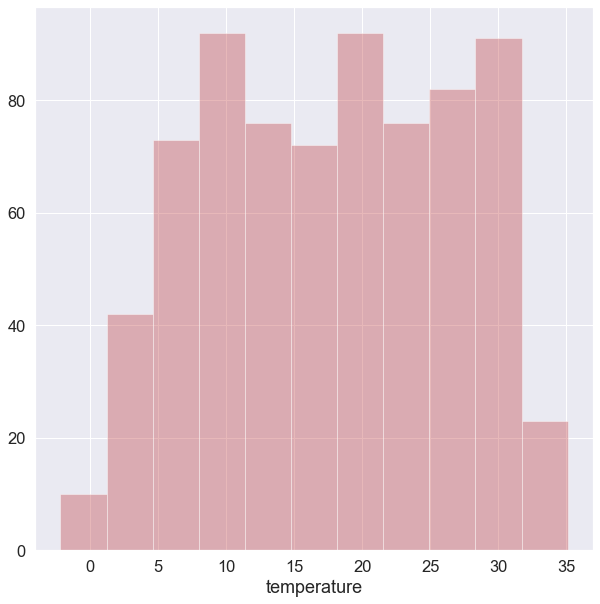

In [64]:
sns.distplot(df["temperature"] , kde= False , color = "r") 

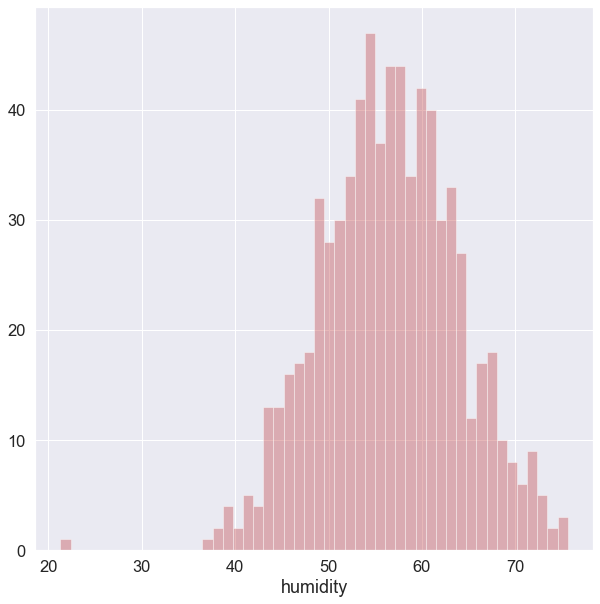

In [69]:
sns.distplot(df["humidity"] , kde= False , color = "r" , bins=50) 

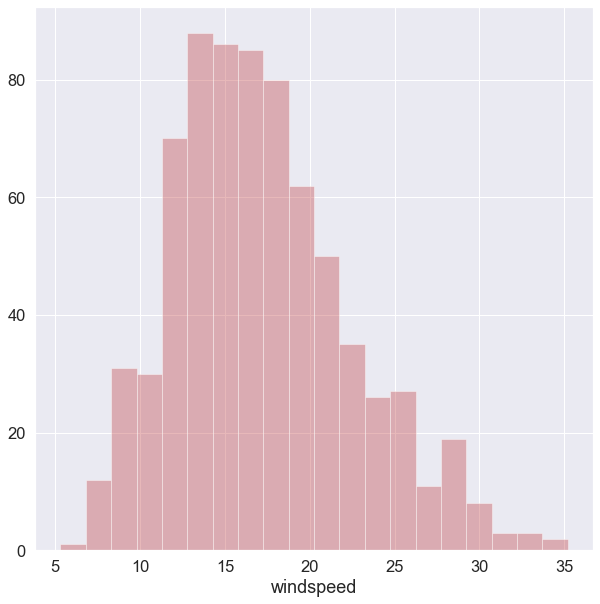

In [70]:
sns.distplot(df["windspeed"] , kde= False , color = "r") 

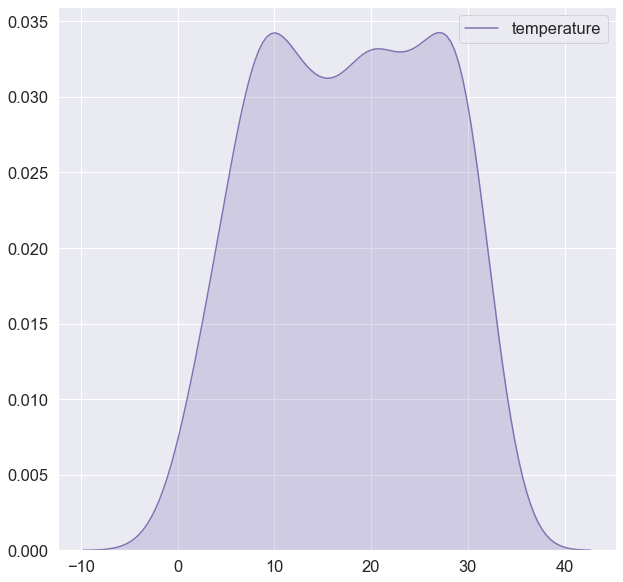

In [71]:
sns.kdeplot(df["temperature"] ,  shade= True , color = "m")

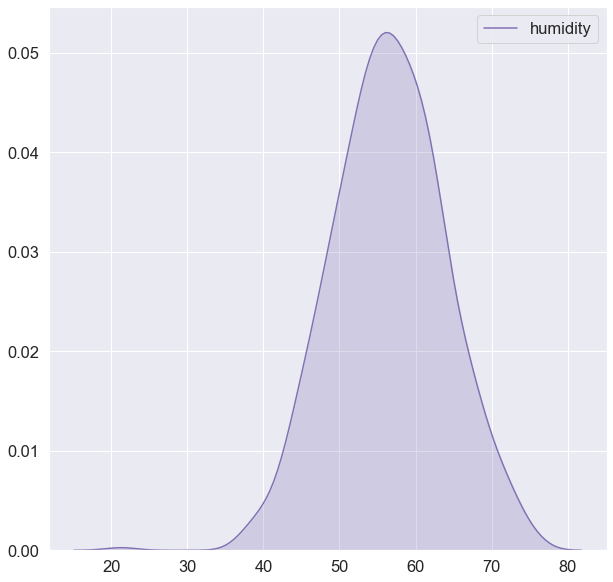

In [72]:
sns.kdeplot(df["humidity"] ,  shade= True , color = "m")

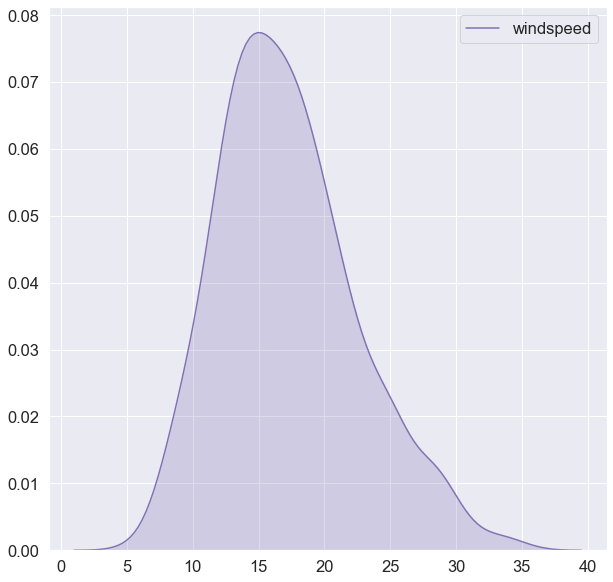

In [73]:
sns.kdeplot(df["windspeed"] ,  shade= True , color = "m")

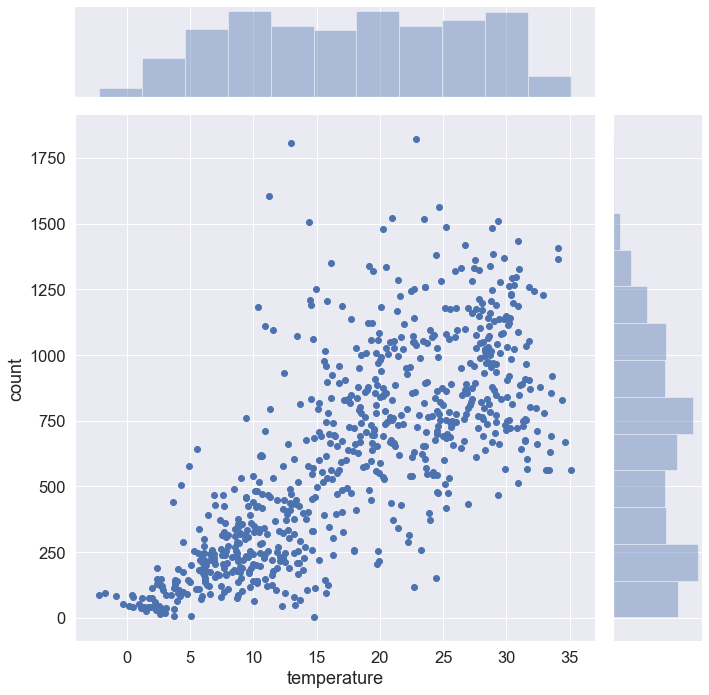

In [76]:
sns.jointplot( x = "temperature" , y = "count" , data = df , kind="scatter" , height=10)

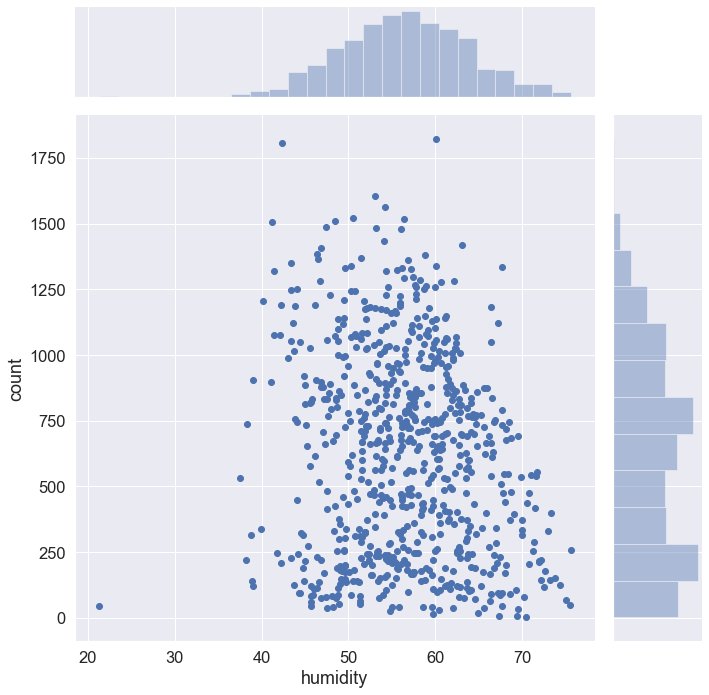

In [77]:
sns.jointplot( x = "humidity" , y = "count" , data = df , kind="scatter" , height=10)

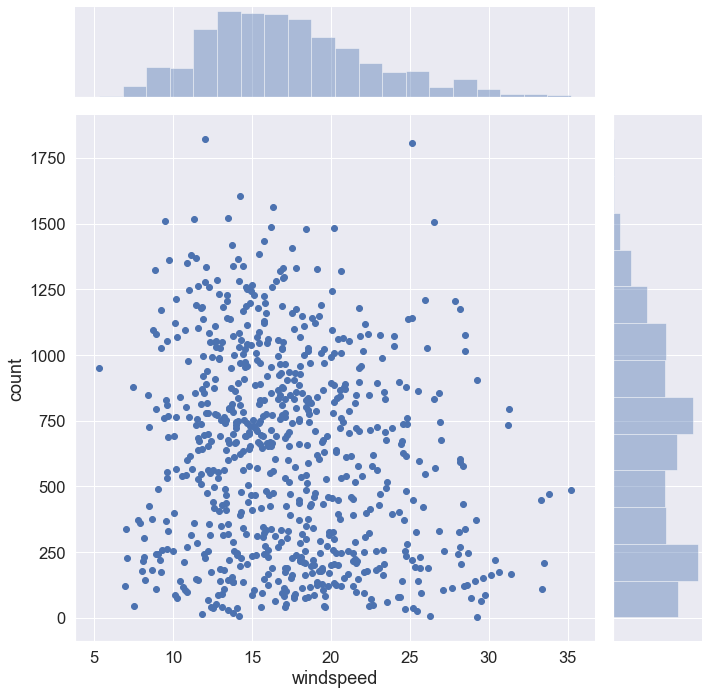

In [79]:
sns.jointplot( x = "windspeed" , y = "count" , data = df , kind="scatter" , height=10)

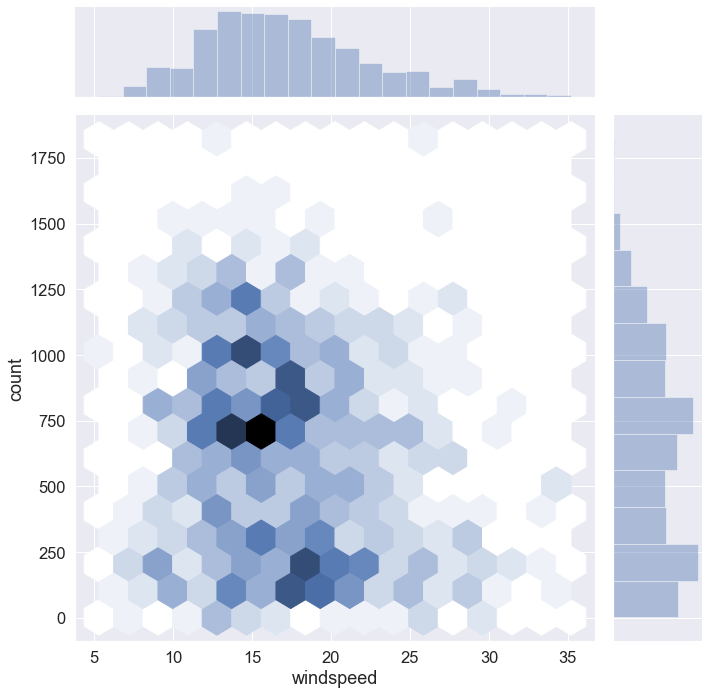

In [80]:
sns.jointplot( x = "windspeed" , y = "count" , data = df , kind="hex" , height=10)

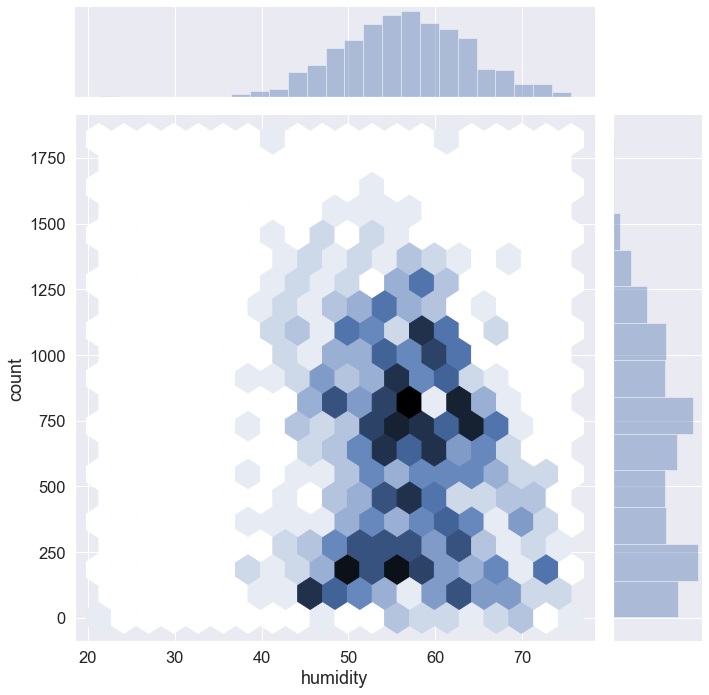

In [81]:
sns.jointplot( x = "humidity" , y = "count" , data = df , kind="hex" , height=10)

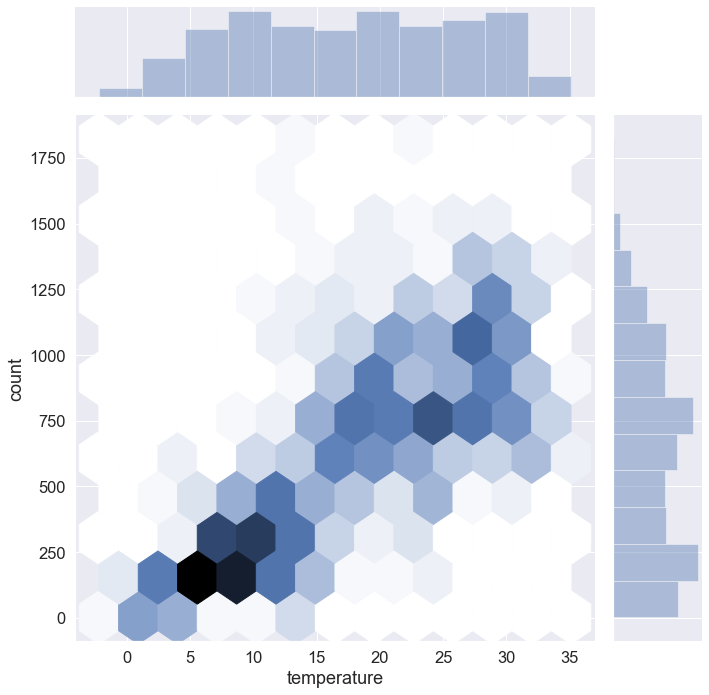

In [82]:
sns.jointplot( x = "temperature" , y = "count" , data = df , kind="hex" , height=10)

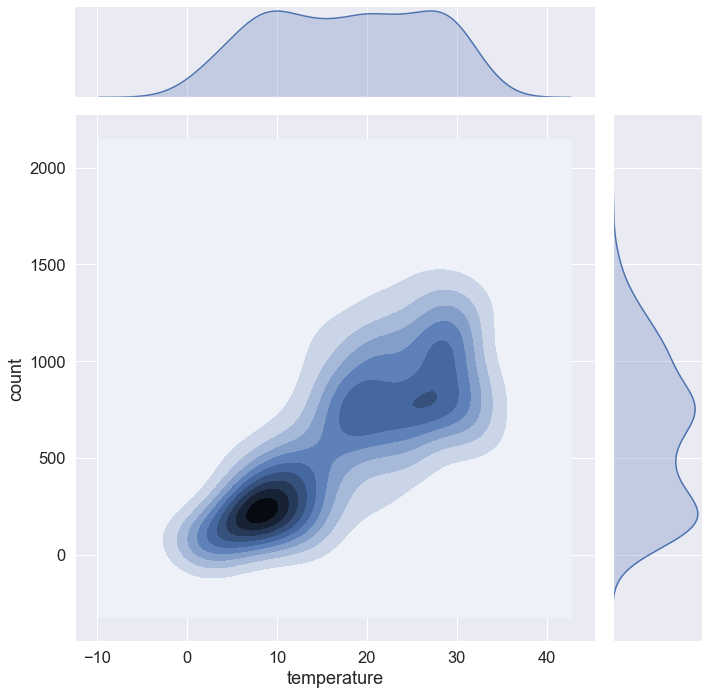

In [83]:
sns.jointplot( x = "temperature" , y = "count" , data = df , kind="kde" , height=10)

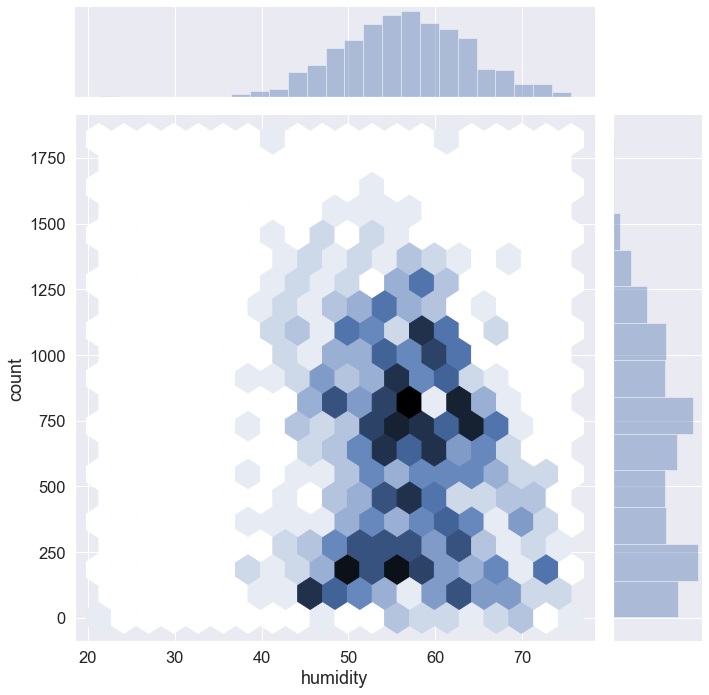

In [84]:
sns.jointplot( x = "humidity" , y = "count" , data = df , kind="hex" , height=10)

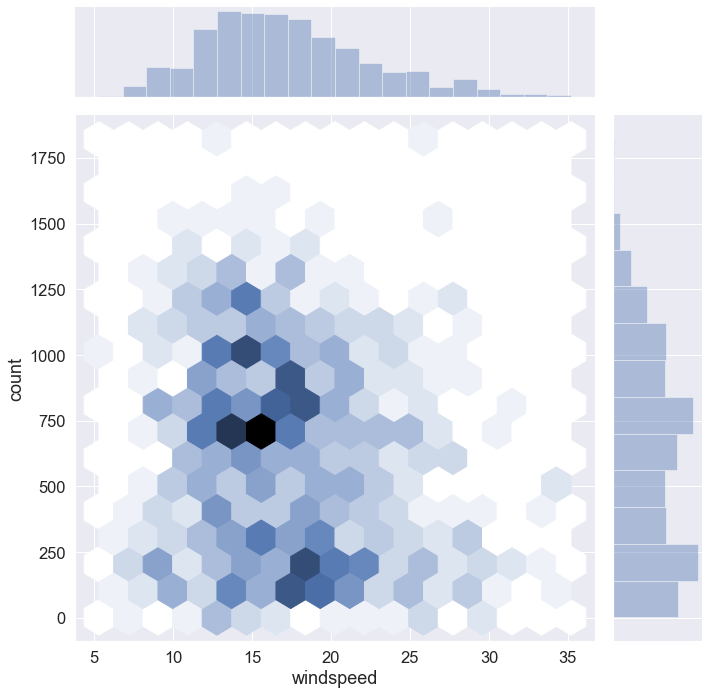

In [85]:
sns.jointplot( x = "windspeed" , y = "count" , data = df , kind="hex" , height=10)

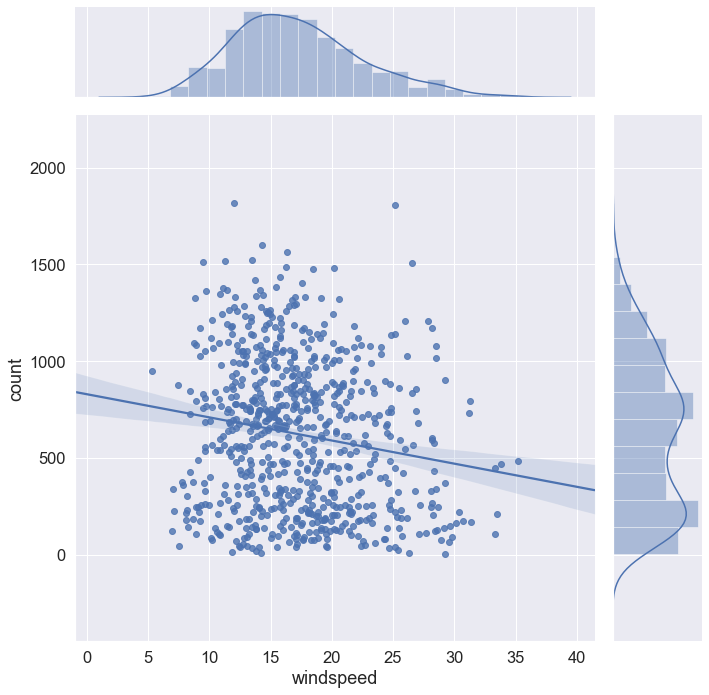

In [86]:
sns.jointplot( x = "windspeed" , y = "count" , data = df , kind="reg" , height=10)

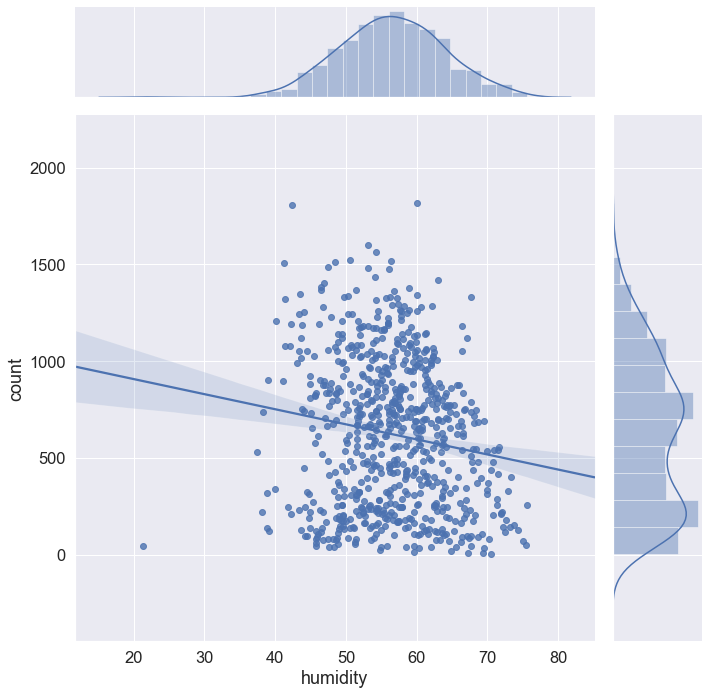

In [87]:
sns.jointplot( x = "humidity" , y = "count" , data = df , kind="reg" , height=10)

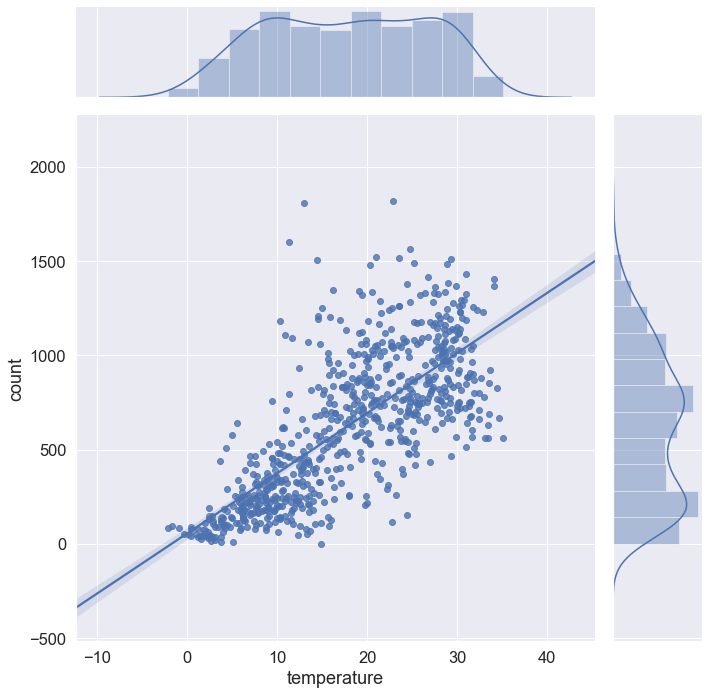

In [88]:
sns.jointplot( x = "temperature" , y = "count" , data = df , kind="reg" , height=10)

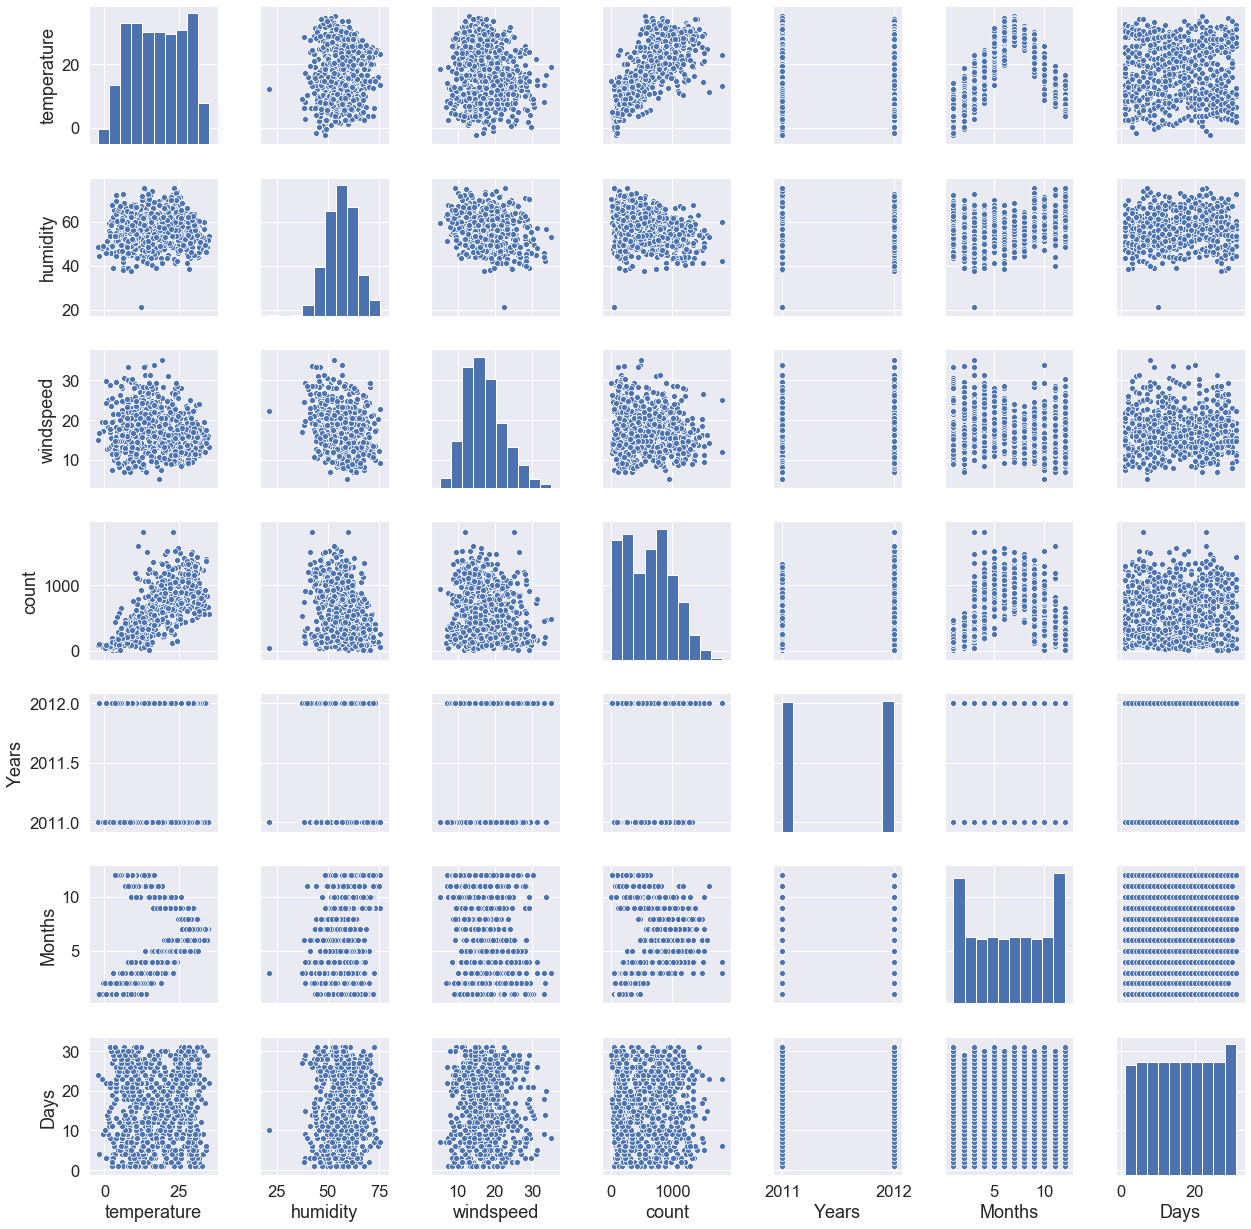

In [89]:
sns.pairplot(df)

In [90]:
df.columns

Index(['date', 'temperature', 'humidity', 'windspeed', 'count', 'Years',
       'Months_Name', 'Day_Name', 'Months', 'Days', 'Mon_Pred'],
      dtype='object')

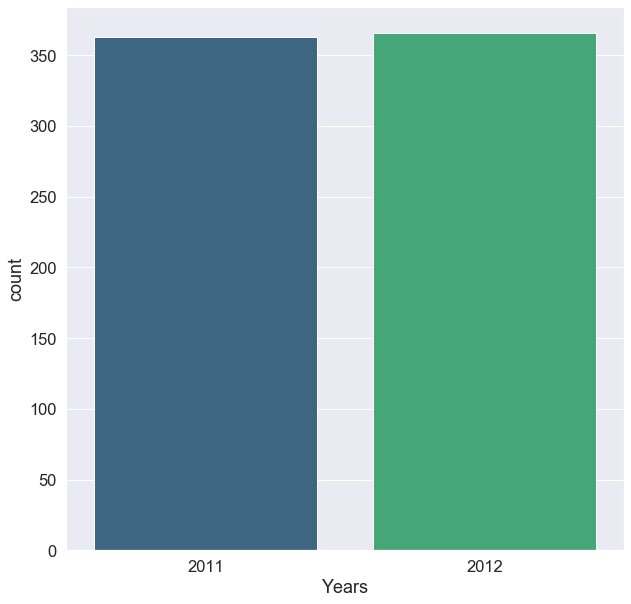

In [91]:
sns.countplot("Years" ,  data = df , palette="viridis")

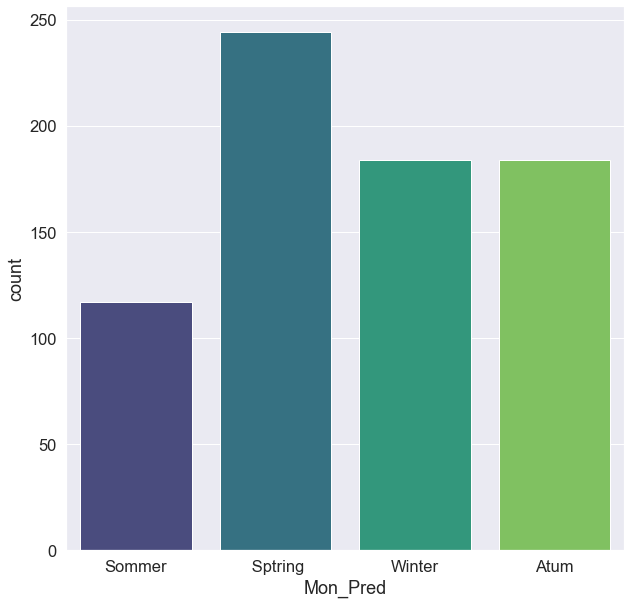

In [92]:
sns.countplot("Mon_Pred" ,  data = df , palette="viridis")

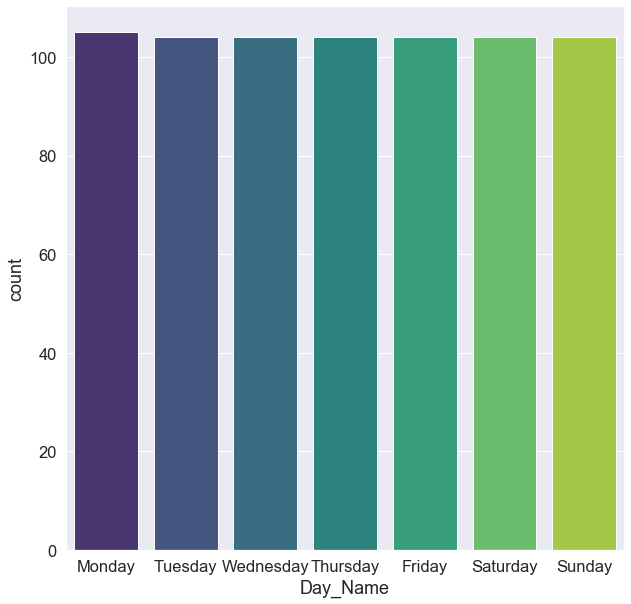

In [93]:
sns.countplot("Day_Name" ,  data = df , palette="viridis")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

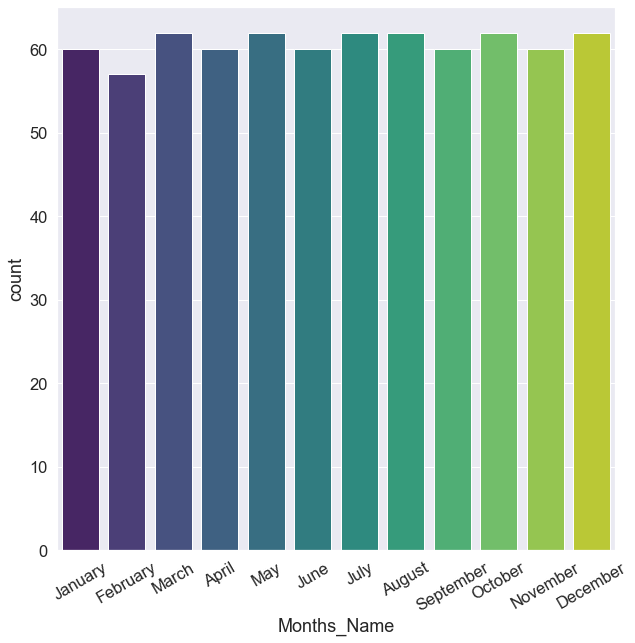

In [95]:
sns.countplot("Months_Name" ,  data = df , palette="viridis")
plt.xticks(ROTATION = 30)

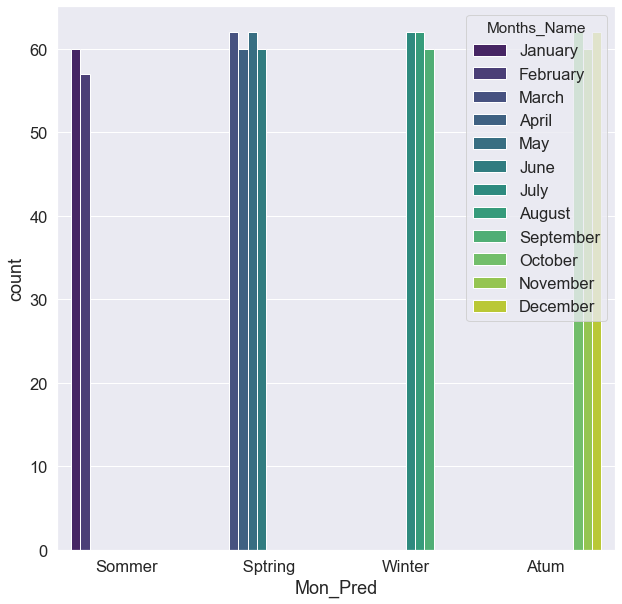

In [98]:
sns.countplot("Mon_Pred" ,  data = df , palette="viridis" , hue="Months_Name")


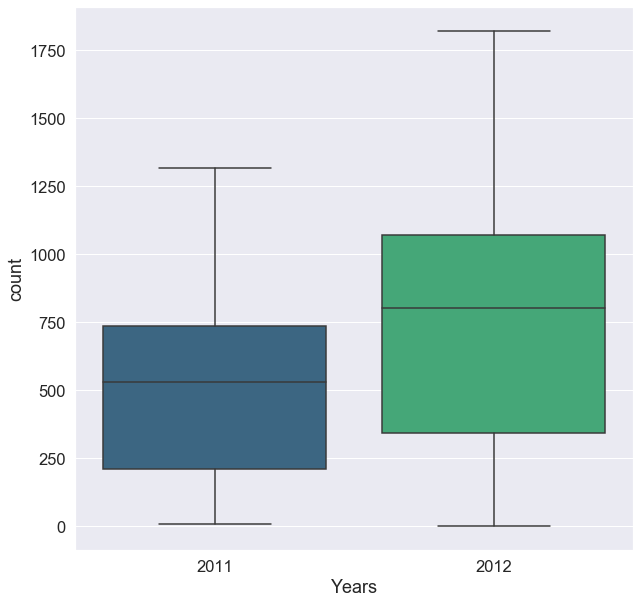

In [101]:
sns.boxplot( "Years" , "count" , data = df , palette="viridis")

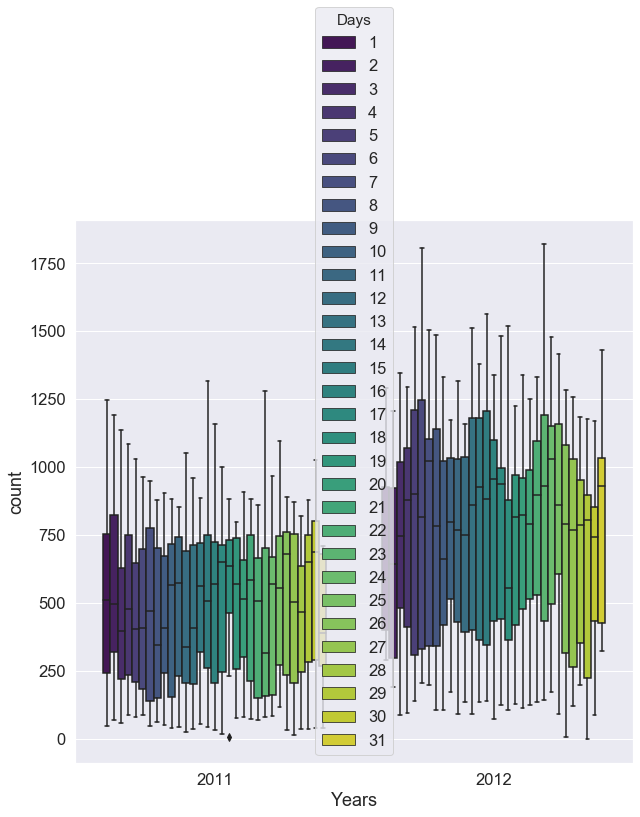

In [102]:
sns.boxplot( "Years" , "count" , data = df , palette="viridis" , hue="Days")

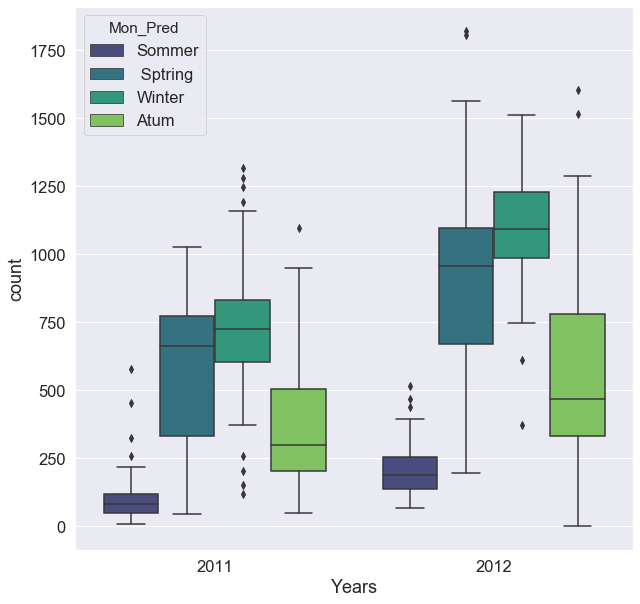

In [103]:
sns.boxplot( "Years" , "count" , data = df , palette="viridis" , hue="Mon_Pred")

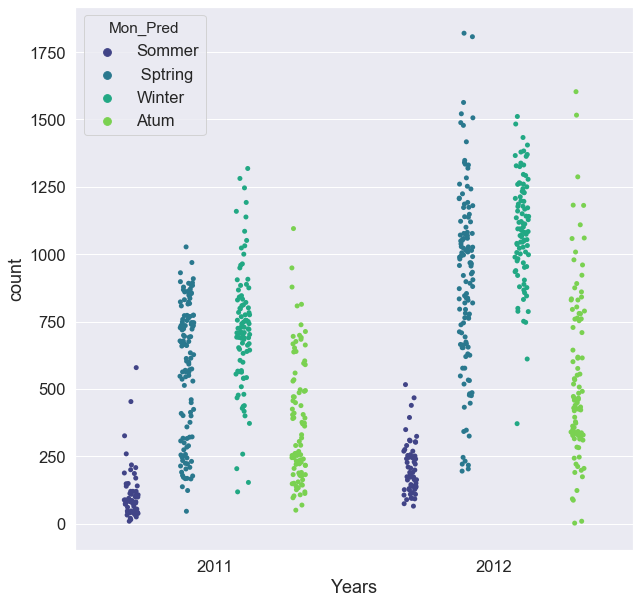

In [105]:
sns.stripplot( "Years" , "count" , data = df , palette="viridis" , hue="Mon_Pred" , dodge=True)

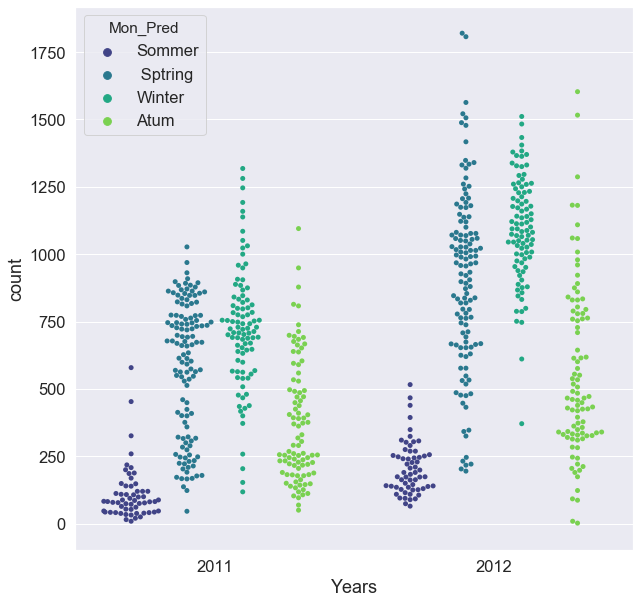

In [106]:
sns.swarmplot( "Years" , "count" , data = df , palette="viridis" , hue="Mon_Pred" , dodge=True)

In [107]:
df

,date,temperature,humidity,windspeed,count,Years,Months_Name,Day_Name,Months,Days,Mon_Pred
0,2011-01-03,2.716070,45.715346,21.414957,120,2011,January,Monday,1,3,Sommer
1,2011-01-04,2.896673,54.267219,15.136882,108,2011,January,Tuesday,1,4,Sommer
2,2011-01-05,4.235654,45.697702,17.034578,82,2011,January,Wednesday,1,5,Sommer
3,2011-01-06,3.112643,50.237349,10.091568,88,2011,January,Thursday,1,6,Sommer
4,2011-01-07,2.723918,49.144928,15.738204,148,2011,January,Friday,1,7,Sommer
...,...,...,...,...,...,...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247,2012,December,Thursday,12,27,Atum
725,2012-12-28,5.545775,54.242931,14.792709,644,2012,December,Friday,12,28,Atum
726,2012-12-29,4.924888,54.010283,14.777848,576,2012,December,Saturday,12,29,Atum
727,2012-12-30,4.304001,53.777635,14.762987,507,2012,December,Sunday,12,30,Atum


In [108]:
df.drop(["Days" , "Months" , "date"]  , axis=1 , inplace=True)

In [109]:
df

,temperature,humidity,windspeed,count,Years,Months_Name,Day_Name,Mon_Pred
0,2.716070,45.715346,21.414957,120,2011,January,Monday,Sommer
1,2.896673,54.267219,15.136882,108,2011,January,Tuesday,Sommer
2,4.235654,45.697702,17.034578,82,2011,January,Wednesday,Sommer
3,3.112643,50.237349,10.091568,88,2011,January,Thursday,Sommer
4,2.723918,49.144928,15.738204,148,2011,January,Friday,Sommer
...,...,...,...,...,...,...,...,...
724,5.587201,57.755931,28.678187,247,2012,December,Thursday,Atum
725,5.545775,54.242931,14.792709,644,2012,December,Friday,Atum
726,4.924888,54.010283,14.777848,576,2012,December,Saturday,Atum
727,4.304001,53.777635,14.762987,507,2012,December,Sunday,Atum


In [110]:
df = pd.get_dummies(df , columns=["Months_Name" , "Day_Name" , "Mon_Pred"] , drop_first=True)

In [111]:
df

,temperature,humidity,windspeed,count,Years,Months_Name_August,Months_Name_December,Months_Name_February,Months_Name_January,Months_Name_July,...,Months_Name_September,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Mon_Pred_Atum,Mon_Pred_Sommer,Mon_Pred_Winter
0,2.716070,45.715346,21.414957,120,2011,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2.896673,54.267219,15.136882,108,2011,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,4.235654,45.697702,17.034578,82,2011,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,3.112643,50.237349,10.091568,88,2011,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,2.723918,49.144928,15.738204,148,2011,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,5.587201,57.755931,28.678187,247,2012,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
725,5.545775,54.242931,14.792709,644,2012,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
726,4.924888,54.010283,14.777848,576,2012,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
727,4.304001,53.777635,14.762987,507,2012,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [112]:
# Prosesing adat ::
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [116]:
X = df.drop("count" , axis = 1)
y = df["count"]

In [117]:
X

,temperature,humidity,windspeed,Years,Months_Name_August,Months_Name_December,Months_Name_February,Months_Name_January,Months_Name_July,Months_Name_June,...,Months_Name_September,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Mon_Pred_Atum,Mon_Pred_Sommer,Mon_Pred_Winter
0,2.716070,45.715346,21.414957,2011,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2.896673,54.267219,15.136882,2011,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,4.235654,45.697702,17.034578,2011,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,3.112643,50.237349,10.091568,2011,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2.723918,49.144928,15.738204,2011,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,5.587201,57.755931,28.678187,2012,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
725,5.545775,54.242931,14.792709,2012,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
726,4.924888,54.010283,14.777848,2012,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
727,4.304001,53.777635,14.762987,2012,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [118]:
y

0      120
1      108
2       82
3       88
4      148
      ... 
724    247
725    644
726    576
727    507
728    439
Name: count, Length: 729, dtype: int64

In [119]:
x_train , x_test , y_train , y_test = train_test_split( X , y , shuffle=True , random_state=44 , test_size=0.2)

In [120]:
Scaller = StandardScaler()
x_train = Scaller.fit_transform(x_train)
x_test = Scaller.transform(x_test)

In [121]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [122]:
Models = { 
           "LR"   : LinearRegression() ,
           "Rid"  : Ridge() ,
           "Lass" : Lasso() ,
           "SVR"  : SVR() ,
           "DT"   : DecisionTreeRegressor() ,
           "RF"   : RandomForestRegressor() , 
           "KNN"  :KNeighborsRegressor() ,
           "XGBR" : XGBRegressor()
          
        }

In [123]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}")
    Model.fit( x_train , y_train )
    print(f"The Traing Score :: {Model.score(x_train , y_train)}")
    print(f"The Testing Score :: {Model.score(x_test, y_test)}")
    print("*" * 30)

The Model :: LR
The Traing Score :: 0.7829785883476326
The Testing Score :: 0.7648963881387092
******************************
The Model :: Rid
The Traing Score :: 0.7829713625265899
The Testing Score :: 0.7649831565367009
******************************
The Model :: Lass
The Traing Score :: 0.7824910558198583
The Testing Score :: 0.7657977387735666
******************************
The Model :: SVR
The Traing Score :: 0.0818683826575256
The Testing Score :: 0.06641605132549055
******************************
The Model :: DT
The Traing Score :: 1.0
The Testing Score :: 0.4987614272283528
******************************
The Model :: RF
The Traing Score :: 0.9690733409882362
The Testing Score :: 0.803033914257016
******************************
The Model :: KNN
The Traing Score :: 0.7557054724052834
The Testing Score :: 0.5393651497306209
******************************
The Model :: XGBR
The Traing Score :: 0.9998044539652452
The Testing Score :: 0.8103743511999951
******************************


* From The Result above we can see some Observations ::
    * Model :: LR :: not efficiet more .
         * Becouse Its Traning and testing Not high Take less Values (0.78 , 0.76)
    * Models :: Ridge , Lasso:: as Same The LR_Model Observation
         * They have The Same Score of Training and Testing (0.78,0.76)
    * Model :: SVR :: Its Consider The Most Common Prob Which OverFitting Problem ::
         * Becouse The Score Of Traing high (0.08) and The Score Of Testing More Low(0.06).
    * Model :: DT :: Also Consider The Problem of Overfitting problem .
         * The score of training High (0.1) and The Score of Testing More Loww(0.49)
    * Model :: RF :: Its One of the most efficient ML algo on that case .
         * Becouse Traing Score and Testing Score Efficient (0.98 , 0.80)
    * Model :: KNN :: Also Consider The overfitting Problem.
    * Model :: XGBR :: Also one of the Most effieint ML Algo on tha Case .
         * Its Trainging Score and Testing Score Good and Efficient Values (0.99 , 0.81)

* So That we Will apply RF and XGBR Algo on that case.

In [127]:
Model1 = RandomForestRegressor()
Model2 = XGBRegressor()

Model1.fit(x_train , y_train)
y_pred = Model1.predict(x_test)



In [131]:
y_pred

array([ 688.16,  142.11,  696.94, 1012.47,  457.43,  698.15,  192.74,
        735.47,  228.15,  408.3 ,  656.94,   72.66, 1124.37,  885.76,
        356.  ,  428.8 , 1216.64,  449.19,  385.18,  697.76,  766.5 ,
        359.82,  517.5 ,   78.48,  257.8 ,  665.98,  257.56,  984.19,
        260.5 ,  496.86,  258.8 ,  900.44,  232.83,  623.18,  481.13,
        691.87,  685.82,  916.21,  769.33,  755.21,  784.68,   74.37,
        882.96,  603.96,  706.16, 1095.9 ,  501.97, 1153.95,  898.01,
        317.55, 1225.06,  286.03,  540.62,  292.16,  662.62,  680.47,
        836.84,  505.77, 1246.37,  165.74,  762.84,  698.54,  127.79,
        617.84,  257.18,  499.81, 1172.17,  701.09,  194.45,  148.51,
         56.83,  748.92,  322.54,  755.14, 1142.91,  565.91,  656.19,
        954.86,  784.19,  931.39,  918.86,  128.91,  758.3 ,  770.16,
       1031.7 ,  158.35,  528.97,  111.86,  639.98,  936.09,  765.48,
        227.59,  201.55,  666.09,  515.21,  173.05, 1194.45,  679.74,
        255.41, 1034

In [132]:
y_test

351     216
386     439
252     690
643    1058
47      453
       ... 
229     809
345     178
376     162
658     830
358     103
Name: count, Length: 146, dtype: int64

In [133]:
import joblib
Model = joblib.dump(Model1 , "Model1.h5")
Scaller = joblib.dump(Scaller , "Scaller.h5")

In [135]:
X.columns

Index(['temperature', 'humidity', 'windspeed', 'Years', 'Months_Name_August',
       'Months_Name_December', 'Months_Name_February', 'Months_Name_January',
       'Months_Name_July', 'Months_Name_June', 'Months_Name_March',
       'Months_Name_May', 'Months_Name_November', 'Months_Name_October',
       'Months_Name_September', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'Mon_Pred_Atum', 'Mon_Pred_Sommer',
       'Mon_Pred_Winter'],
      dtype='object')

In [136]:
df.iloc[0:5]

,temperature,humidity,windspeed,count,Years,Months_Name_August,Months_Name_December,Months_Name_February,Months_Name_January,Months_Name_July,...,Months_Name_September,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Mon_Pred_Atum,Mon_Pred_Sommer,Mon_Pred_Winter
0,2.716070,45.715346,21.414957,120,2011,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,2.896673,54.267219,15.136882,108,2011,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,4.235654,45.697702,17.034578,82,2011,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,3.112643,50.237349,10.091568,88,2011,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,2.723918,49.144928,15.738204,148,2011,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cus